In [9]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem import Lipinski

df = pd.read_csv('data_final_2_class_pKi.csv')

In [10]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [11]:
df_lipinski = lipinski(df.Canonical_Smiles)

In [12]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,414.505,3.57260,3.0,4.0
1,448.950,3.53030,1.0,4.0
2,775.391,4.48514,5.0,7.0
3,614.703,2.01887,8.0,7.0
4,400.522,3.68160,3.0,3.0
...,...,...,...,...
2946,428.577,2.91140,3.0,7.0
2947,257.333,2.67782,1.0,3.0
2948,441.576,2.40440,3.0,7.0
2949,316.489,3.39910,2.0,3.0


In [13]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [14]:
df_combined

,ChEMBL ID,Smiles,Canonical_Smiles,bioactivity_class,pKi,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL567175,Oc1ccc2c3c1O[C@@H]1[C@@]43CCN([C@H](C2)[C@]4(O...,Oc1ccc2c3c1O[C@@H]1[C@@]43CCN([C@H](C2)[C@]4(O...,active,10.000000,414.505,3.57260,3.0,4.0
1,CHEMBL2113666,CN1CC[C@]23c4c5cccc4O[C@H]2C(=O)CC[C@@]3(NC(=O...,O=C(N[C@]12CCC(=O)[C@H]3[C@]42CCN([C@@H]1Cc1c4...,active,10.000000,448.950,3.53030,1.0,4.0
2,CHEMBL1649941,CCCC[C@@H](NC(=O)[C@@H](N)Cc1c(C)cc(O)cc1C)C(=...,CCCC[C@H](C(=O)NCC(=O)N[C@H](C(=O)N1CCC(CC1)N(...,active,10.000000,775.391,4.48514,5.0,7.0
3,CHEMBL334715,N=C(N)NCCC[C@@H](NC(=O)c1cccc2c3c([nH]c12)[C@@...,NC(=N)NCCC[C@H](C(=O)O)NC(=O)c1cccc2c1[nH]c1c2...,active,10.000000,614.703,2.01887,8.0,7.0
4,CHEMBL3785854,Oc1ccc2c(c1)[C@]13CCN(CC4CC4)[C@@H](C2)[C@]1(O...,Oc1ccc2c(c1)[C@@]13CCN([C@@H](C2)[C@]3(O)Cc2c(...,active,10.000000,400.522,3.68160,3.0,3.0
...,...,...,...,...,...,...,...,...,...
2946,CHEMBL3698762,O=c1c(NC(CO)CO)nc2ccccc2n1C1CCN(C2CCCCCCC2)CC1,OCC(Nc1nc2ccccc2n(c1=O)C1CCN(CC1)C1CCCCCCC1)CO,inactive,4.064397,428.577,2.91140,3.0,7.0
2947,CHEMBL1076554,Cc1cccc(O)c1C(=O)C1=CCCN2CCC[C@@H]12,Cc1cccc(c1C(=O)C1=CCCN2[C@H]1CCC2)O,inactive,4.026872,257.333,2.67782,1.0,3.0
2948,CHEMBL3695269,NC(=O)[C@H](CO)Nc1nc2ccccc2n(C2CCN(C3CCCCCCC3)...,OC[C@@H](C(=O)N)Nc1nc2ccccc2n(c1=O)C1CCN(CC1)C...,inactive,4.017715,441.576,2.40440,3.0,7.0
2949,CHEMBL233535,NCc1ccccc1C1(O)CCN(CC2CCCCCC2)CC1,NCc1ccccc1C1(O)CCN(CC1)CC1CCCCCC1,inactive,4.002155,316.489,3.39910,2.0,3.0


In [15]:
df_combined.to_csv('data_2class_pKi_Lipinski.csv', index=False)

In [16]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

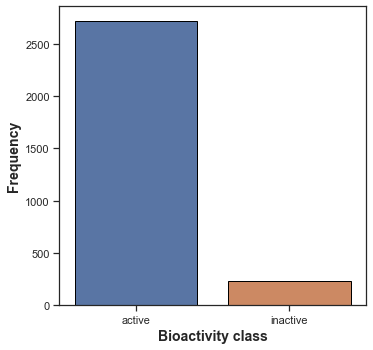

In [18]:
plot = plt.figure(figsize=(5.5, 5.5))

detail = sns.countplot(x='bioactivity_class', data=df_combined, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

In [19]:
import matplotlib.pyplot as plt

In [20]:
plt.figure(figsize=(5.5, 5.5))

<Figure size 396x396 with 0 Axes>

<Figure size 396x396 with 0 Axes>

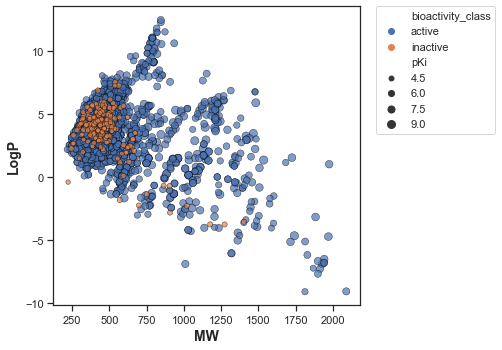

In [22]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_combined, hue='bioactivity_class', size='pKi', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

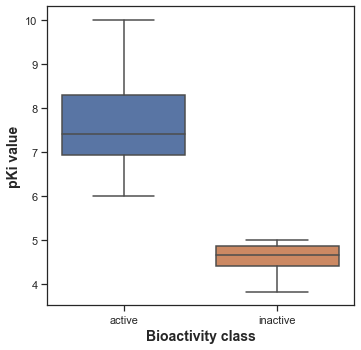

In [24]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pKi', data = df_combined)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pKi value', fontsize=14, fontweight='bold')

plt.savefig('plot_pKi.pdf')

In [25]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_combined[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_combined[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [26]:
mannwhitney('pKi')

,Descriptor,Statistics,p,alpha,Interpretation
0,pKi,625830.0,1.829824e-140,0.05,Different distribution (reject H0)


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,361996.0,0.000076,0.05,Different distribution (reject H0)


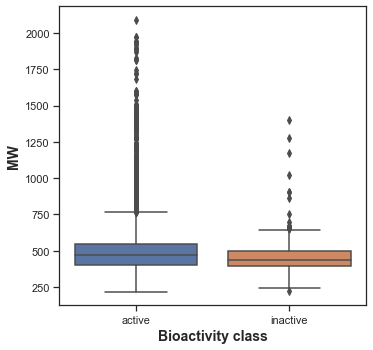

In [27]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_combined)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,306284.0,0.593078,0.05,Same distribution (fail to reject H0)


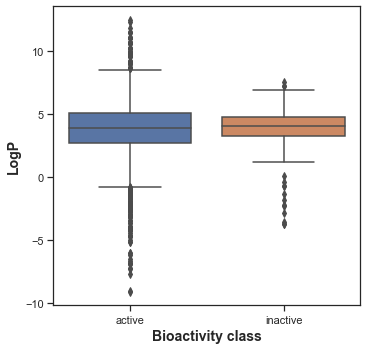

In [28]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_combined)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,385013.0,1.862068e-09,0.05,Different distribution (reject H0)


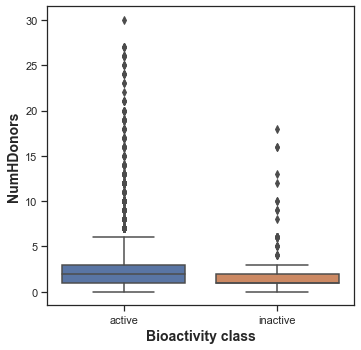

In [29]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_combined)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,285699.0,0.026368,0.05,Different distribution (reject H0)


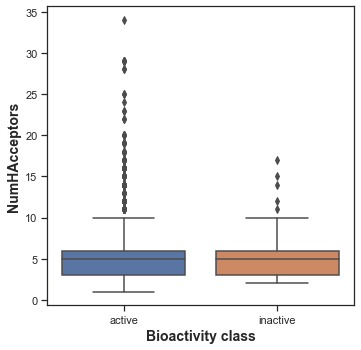

In [30]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_combined)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

mannwhitney('NumHAcceptors')

In [3]:
import pandas as pd
from padelpy import padeldescriptor

In [4]:
df_desc = pd.read_csv('data_final_2_class_pKi.csv')

In [6]:
selection = ['Canonical_Smiles','ChEMBL ID']
df_selection = df_desc[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [8]:
! cat molecule.smi | head -5

Oc1ccc2c3c1O[C@@H]1[C@@]43CCN([C@H](C2)[C@]4(O)Cc2c1[nH]c1c2cccc1)CC1CC1	CHEMBL567175
O=C(N[C@]12CCC(=O)[C@H]3[C@]42CCN([C@@H]1Cc1c4c(O3)ccc1)C)/C=C/c1ccccc1Cl	CHEMBL2113666
CCCC[C@H](C(=O)NCC(=O)N[C@H](C(=O)N1CCC(CC1)N(c1ccccc1)C(=O)CC)Cc1ccc(cc1)Cl)NC(=O)[C@H](Cc1c(C)cc(cc1C)O)N	CHEMBL1649941
NC(=N)NCCC[C@H](C(=O)O)NC(=O)c1cccc2c1[nH]c1c2C[C@@]2(C34[C@H]1Oc1c4c(CC2N(CC3)CC2CC2)ccc1O)O	CHEMBL334715
Oc1ccc2c(c1)[C@@]13CCN([C@@H](C2)[C@]3(O)Cc2c(C1)[nH]c1c2cccc1)CC1CC1	CHEMBL3785854


cat: write error: No space left on device


In [9]:
! cat molecule.smi | wc -l

2951


In [10]:
padeldescriptor(fingerprints=True, mol_dir='molecule.smi', d_file='descriptors.csv')

In [11]:
df_desc_X = pd.read_csv('descriptors.csv')

In [12]:
df_desc_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL2113666,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL607125,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1649941,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL3785854,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL567175,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,CHEMBL3695269,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2947,CHEMBL233535,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2948,CHEMBL241272,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2949,CHEMBL2163918,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_desc_X = df_desc_X.drop(columns=['Name'])
df_desc_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2947,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2948,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2949,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_desc_Y = df_desc['pKi']
df_desc_Y

0       10.000000
1       10.000000
2       10.000000
3       10.000000
4       10.000000
          ...    
2946     4.064397
2947     4.026872
2948     4.017715
2949     4.002155
2950     3.822795
Name: pKi, Length: 2951, dtype: float64

In [15]:
dataset = pd.concat([df_desc_X,df_desc_Y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pKi
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.000000
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.000000
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.000000
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.000000
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.064397
2947,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.026872
2948,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.017715
2949,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.002155


In [16]:
dataset.to_csv('delta_data_final_2class_pKi_pubchem_fp.csv', index=False)

In [17]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [18]:
df_analysis = pd.read_csv('delta_data_final_2class_pKi_pubchem_fp.csv')
df_analysis

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pKi
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.000000
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.000000
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.000000
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.000000
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.064397
2947,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.026872
2948,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.017715
2949,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.002155


In [19]:
X = df_analysis.drop('pKi', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2947,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2948,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2949,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
Y = df_analysis.pKi
Y

0       10.000000
1       10.000000
2       10.000000
3       10.000000
4       10.000000
          ...    
2946     4.064397
2947     4.026872
2948     4.017715
2949     4.002155
2950     3.822795
Name: pKi, Length: 2951, dtype: float64

In [21]:
X.shape

(2951, 881)

In [22]:
Y.shape

(2951,)

In [23]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [24]:
X.shape

(2951, 155)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [26]:
X_train.shape, Y_train.shape

((2360, 155), (2360,))

In [27]:
X_test.shape, Y_test.shape

((591, 155), (591,))

In [28]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.6421446959211705

In [29]:
Y_pred = model.predict(X_test)

C:\Users\Zizi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

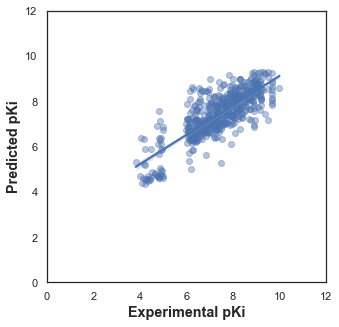

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pKi', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pKi', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show